# First tests to load and display data

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Import the data in Donnees-annuelles-de-consommation-de-produits-petroliers-par-departement-France-metropol.2022-09.csv
dataframe_fuel = gpd.read_file('../__data/Donnees-annuelles-de-consommation-de-produits-petroliers-par-departement-France-metropol.2022-09.csv', sep=';')

#Select the columns to keep
keys_to_keep = ["DEPARTEMENT_CODE", "ANNEE", "GAZOLE", 'SUPER_PLOMBE', 'SUPER_SANS_PLOMB', 'FOD', 'FOL']
dataframe_fuel = dataframe_fuel[keys_to_keep]

#Remove all the rows where the department code is not a number
dataframe_fuel = dataframe_fuel[dataframe_fuel["DEPARTEMENT_CODE"].str.isnumeric()]
#Remove all the rows where the department code is greater than 95
dataframe_fuel = dataframe_fuel[dataframe_fuel["DEPARTEMENT_CODE"].astype(int) <= 96]


#Convert the columns year and fuel consumption to numeric values
dataframe_fuel["ANNEE"] = pd.to_numeric(dataframe_fuel["ANNEE"])
dataframe_fuel["GAZOLE"] = pd.to_numeric(dataframe_fuel["GAZOLE"])

#For each year, build a list where the ith element corresponds to the total fuel consumption in the ith department
fuel_consumption = {}
for year in range(2005, 2022):
    fuel_consumption[year] = []
    #Go through each row of the dataframe at the year considered

    for index, row in dataframe_fuel[dataframe_fuel["ANNEE"] == year].iterrows():
        fuel_consumption[year].append(row["GAZOLE"])

C:\Users\mathi\AppData\Local\Temp\ipykernel_22628\2417444517.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_scale = plt.cm.get_cmap('Reds')


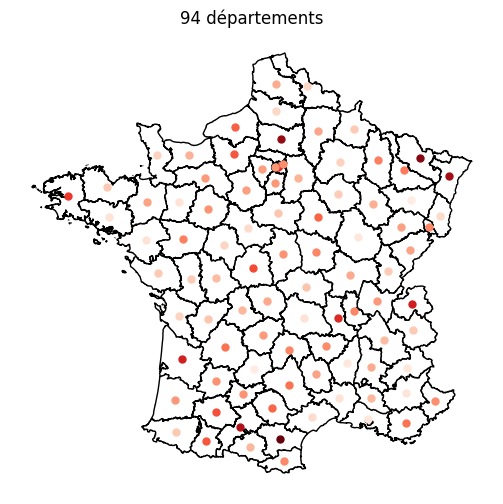

In [3]:

# Download and read the GeoDataFrame from the provided URL
url = "https://www.data.gouv.fr/fr/datasets/r/90b9341a-e1f7-4d75-a73c-bbc010c7feeb"
geo = gpd.read_file(url)

# Extract necessary columns
codes = [_ for _ in set(geo.code) if len(_) < 3]
metropole = geo[geo.code.isin(codes)]

# Reproject to a projected CRS
metropole = metropole.to_crs(epsg=3395)  # Change the EPSG code to an appropriate projected CRS

# Calculate centroids of department polygons
metropole['centroid'] = metropole['geometry'].centroid


#Remove all the rows where the department code is not a number
metropole = metropole[metropole["code"].str.isnumeric()]
#Remove all the rows where the department code is greater than 95
metropole = metropole[metropole["code"].astype(int) <= 96]
#Convert the code column to numeric values
metropole["code"] = pd.to_numeric(metropole["code"])

# Plot departments and add disks at centroids
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
metropole.plot(ax=ax, color='white', edgecolor='black')

#Fuse the two dataframes on the code and DEPARTEMENT_CODE
# metropole = metropole.merge(dataframe_fuel, left_on='code', right_on='DEPARTEMENT_CODE')

color_scale = plt.cm.get_cmap('Reds')
for idx, row in metropole.iterrows():
    #Check if the idx is smaller than the length of the list of fuel consumption
    if idx < len(fuel_consumption[2005]):
        consumption = fuel_consumption[2005][idx]
        color = color_scale(consumption / max(fuel_consumption[2005]))
        centroid = row['centroid']
        ax.plot(centroid.x, centroid.y, 'o', markersize=5, color=color)  # Adjust size and color as needed




ax.set_title("%s départements" % metropole.shape[0])
#remove the axis
ax.axis('off')

plt.show()